# Forecasting Sales with ARIMA

This project aims to forecast sales for a bakery using the Autoregressive Integrated Moving Average (ARIMA) model. The dataset, named 'Bakery Sales.csv,' contains historical sales data from the bakery. The goal is to leverage the ARIMA model to analyze patterns and trends in the sales data and generate accurate forecasts for future sales. By applying time series analysis techniques, including data preprocessing, model fitting, and evaluation, this project seeks to provide insights that can aid in inventory management, staffing decisions, and overall business planning for the bakery.

Dataset link: https://www.kaggle.com/datasets/hosubjeong/bakery-sales

# Summary

### Chapter 1: Exploratory and Statistical Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Null Values
- 1.3: Checking Data Types

### Chapter 2: Data Processing
- 2.1: Handling Missing Values
- 2.2: Handling Outliers
- 2.3: Handling Incorrect Data Types
- 2.4: Data Grouping by Week
- 2.5: Plotting Total Graph
- 2.6: Final Analysis

### Chapter 3: Building ARIMA Model
- 3.1: Autocorrelation and Residuals
- 3.2: Fitting ARIMA Model
- 3.3: Plotting Residuals
- 3.4: Splitting Data
- 3.5: Differencing Data
- 3.6: Walk Forward

### Chapter 4: Conclusions
- 4.1: RMSE
- 4.2: MAE and MAPE
- 4.3: Plotting Real Values X Predictions 

In [3]:
# Let's start by importing the initial libraries needed to carry out our project.
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   

# Eliminate the warnings. 
import warnings
warnings.filterwarnings("ignore")

# Chapter 1 - Exploratory Analysis

In this section, we take a close look at our data to understand what it can tell us. We start by summarizing the main features of the data and then use graphs and charts to visualize it in a way that's easy to understand. By doing this, we hope to find any interesting patterns or trends that can guide us in our further analysis. This step is crucial for getting to know our data better before we dive into more advanced techniques.

### 1.1: Importing Data and First Look

We're gonna start importing our '.csv' file, using the Pandas library.

In [4]:
series = pd.read_csv('Bakery Sales.csv', header=0, index_col=0, parse_dates=True)
series

,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
datetime,,,,,,,,,,,,,,,,,,,,,
2019-07-11 15:35:00,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2019-07-11 16:10:00,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2019-07-12 11:49:00,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-13 13:19:00,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2019-07-13 13:22:00,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select only the 'datetime' (index) and 'total' columns.

In [5]:
bakery_df = series.loc[:, ['total']]
bakery_df

,total
datetime,
2019-07-11 15:35:00,23800.0
2019-07-11 16:10:00,15800.0
2019-07-12 11:49:00,58000.0
2019-07-13 13:19:00,14800.0
2019-07-13 13:22:00,15600.0
...,...
NaT,NaN
NaT,NaN
NaT,NaN


### 1.2: Checking Null Values

In [6]:
# Check if there's any null value in 'index'.
valores_nulos_indice = bakery_df.index.isnull().sum()
print("Number of null values in 'index':", valores_nulos_indice)

# Check if there's any null value in 'total' column.
valores_nulos_total = bakery_df['total'].isnull().sum()
print("Number of null values in 'total' column:", valores_nulos_total)

Number of null values in 'index': 233
Number of null values in 'total' column: 234


There's 233 blank lines in 'index' and 234 lines in 'total'.

### 1.3: Checking Data Types

 We'll use the `dtypes` attribute of the dataframe "bakery_df" to check the data types of each column.

In [7]:
bakery_df.dtypes

total    float64
dtype: object

In [8]:
print(bakery_df['total'].min())
print(bakery_df['total'].mean())
print(bakery_df['total'].median())
print(bakery_df['total'].max())

12800.0
21172.520661157025
18500.0
1293000.0


In bakery_df['total]'.max() an value with more zeros was detected: 1293000.0

This is an outlier that will be removed.

# Chapter 2: Data Processing

In this section, we're gonna prepare our data for analysis. We clean, transform, and reshape the raw data into a format that's suitable for our needs. This involves handling missing values, removing duplicates, and standardizing formats. Our goal in this phase is to ensure that our data is reliable and consistent, setting a solid foundation for our future ML models. By processing the data effectively, we can maximize the accuracy and relevance of our insights, empowering us to make informed decisions based on trustworthy information.

### 2.1: Missing Values 

First of all, we'll handle the null values that we've found in our dataframe on the previous step. 

In [9]:
# Create a function to replace null values with the mean value of a specific column.
def remove_rows_with_null_values(dataframe, column_name):
    dataframe.dropna(subset=[column_name], inplace=True)

The function will be used to replace null values in 'total'.

In [10]:
remove_rows_with_null_values(bakery_df, 'total')
bakery_df

,total
datetime,
2019-07-11 15:35:00,23800.0
2019-07-11 16:10:00,15800.0
2019-07-12 11:49:00,58000.0
2019-07-13 13:19:00,14800.0
2019-07-13 13:22:00,15600.0
...,...
2020-05-02 11:37:00,19500.0
2020-05-02 11:39:00,19800.0
2020-05-02 12:15:00,14300.0


### 2.2: Handling Outliers

We'll remove the outliers of our dataframe with the function created below.

In [11]:
def remove_values_above_max(dataframe, column_name, max_value):
    dataframe.drop(dataframe[dataframe[column_name] >= max_value].index, inplace=True)

Let's see if remove the "1293000.0" value is enough.

In [12]:
# Using the function to replace the values greater than 130000 in 'total'.
remove_values_above_max(bakery_df, 'total', 1293000)


# Check if the values were removed correctly.
# Let's see the greatest value of the column.
bakery_df['total'].max()

116500.0

Now, the maximum value in our bakery_df['total'] is "116500.0", a normal value.

We're done here.

### 2.3: Handling Incorrect Data Types

Let's convert the 'total' column from float to int for use in our model in the future.

In [13]:
# Convert the 'total' column from float to int
bakery_df['total'] = bakery_df['total'].astype(int)
bakery_df

,total
datetime,
2019-07-11 15:35:00,23800
2019-07-11 16:10:00,15800
2019-07-12 11:49:00,58000
2019-07-13 13:19:00,14800
2019-07-13 13:22:00,15600
...,...
2020-05-02 11:37:00,19500
2020-05-02 11:39:00,19800
2020-05-02 12:15:00,14300


### 2.4: Data Grouping by Week

The function defined below will group the dates on a weekly basis.

Since we have relatively few data (equivalent to a period of about 10 months), we will perform a weekly forecast.

If we had data available for a longer period, we could attempt to make a monthly sales forecast

In [14]:
def agrupar_por_semana_e_somar(df):
    # Group the data by week and calculate the sum
    df_semanal = df.resample('W').sum()
    
    return df_semanal

In [15]:
bakery_weekly = agrupar_por_semana_e_somar(bakery_df)
bakery_weekly

,total
datetime,
2019-07-14,427000
2019-07-21,701100
2019-07-28,1236900
2019-08-04,1331900
2019-08-11,1469900
2019-08-18,1357100
2019-08-25,1377200
2019-09-01,1225100
2019-09-08,1146900


### 2.5: Plotting Total Graph

In the plotted graph below, we can observe how the values of the variable "Total" behaved over this period of time.

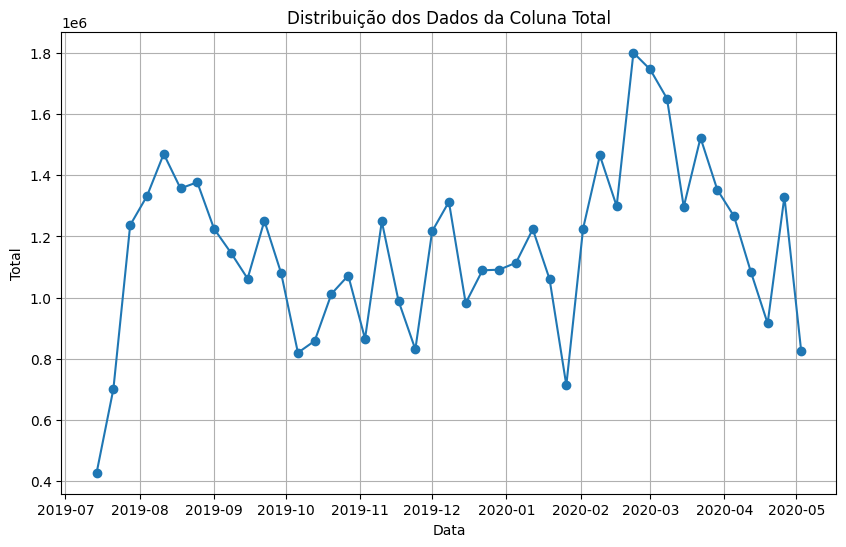

In [16]:
# To plot the distribution of the data in the 'total' column:
plt.figure(figsize=(10, 6))
plt.plot(bakery_weekly.index, bakery_weekly['total'], marker='o', linestyle='-')
plt.title('Distribuição dos Dados da Coluna Total')
plt.xlabel('Data')
plt.ylabel('Total')
plt.grid(True)
plt.show()


In [17]:
# Let's observe the number of rows our dataset has.
len(bakery_weekly)

43

### 2.6: Final Analysis

In [18]:
# The dtypes function shows us the data type of each column.
bakery_weekly.dtypes

total    int32
dtype: object

In [19]:
bakery_weekly

,total
datetime,
2019-07-14,427000
2019-07-21,701100
2019-07-28,1236900
2019-08-04,1331900
2019-08-11,1469900
2019-08-18,1357100
2019-08-25,1377200
2019-09-01,1225100
2019-09-08,1146900


In [20]:
# Find the maximum value of the 'total' column.
max_total = bakery_weekly['total'].max()

# Find the minimum value of the 'total' column.
min_total = bakery_weekly['total'].min()

# Find the average value of the 'total' column.
mean_total = bakery_weekly['total'].mean()

# Find the median value of the 'total' column.
median_total = bakery_weekly['total'].median()

print("Maximum value of the 'total' column:", max_total)
print("Minimum value of the 'total' column:", min_total)
print("Mean value of the 'total' column:", mean_total)
print("Median value of the 'total' column:", median_total)

Maximum value of the 'total' column: 1800900
Minimum value of the 'total' column: 427000
Mean value of the 'total' column: 1161500.0
Median value of the 'total' column: 1216600.0


# Chapter 3: Building and Testing ARIMA Model

At this stage, we will perform sales forecasting for our bakery using an ARIMA model.

### 3.1: Aucorrelation and Residuals

Initially, we will plot graphs to analyze the autocorrelation and the residuals of the model."

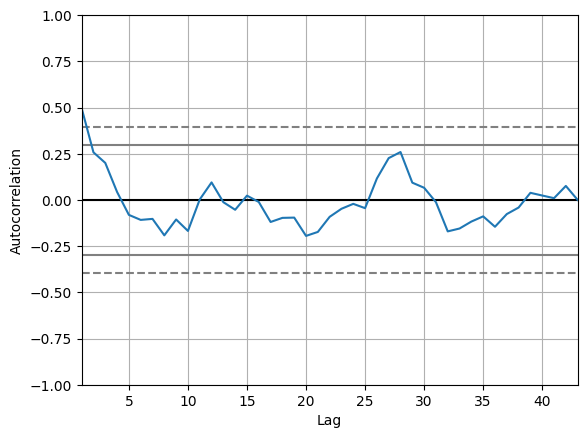

In [21]:
from pandas.plotting import autocorrelation_plot

# autocorrelation plot 
autocorrelation_plot(bakery_weekly)
pyplot.show()

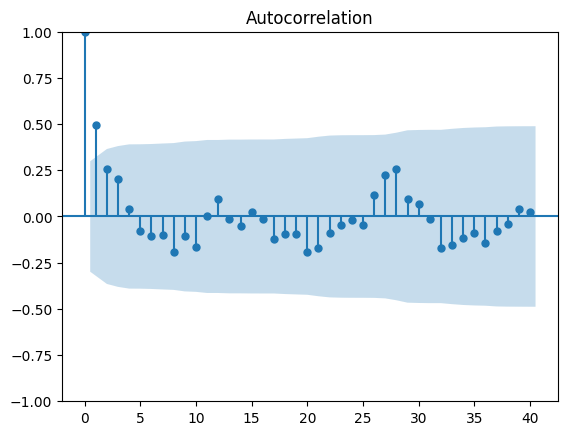

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(bakery_weekly, lags=40)
pyplot.show()

### 3.2: Fitting ARIMA Model

Next, the ARIMA model will be specified and fitted to the weekly bakery sales data. The model residuals will be plotted, and their descriptive statistics will be calculated.

In [23]:
import statsmodels.api as sm

# Initializing ARIMA
order = (7, 1, 1)
model = sm.tsa.ARIMA(bakery_weekly, order=order)

In [24]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  total   No. Observations:                   43
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -578.877
Date:                Wed, 21 Feb 2024   AIC                           1175.754
Time:                        20:04:53   BIC                           1191.393
Sample:                    07-14-2019   HQIC                          1181.487
                         - 05-03-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6242      0.236      2.643      0.008       0.161       1.087
ar.L2          0.0979      0.206      0.477      0.634      -0.305       0.501
ar.L3          0.1766      0.263      0.672      0.502      -0.338       0.692
ar.L4         -0.1009      0.240     -0.420      0.674      -0.571       0.370
ar.L5         -0.2482      0.260     -0.955      0.340      -0.758       0.261
ar.L6         -0.0163      0.226     -0.072      0.943      -0.460       0.427
ar.L7         -0.0379      0.197     -0.192      0.847      -0.424       0.348
ma.L1         -0.8650      0.172     -5.017      0.000      -1.203      -0.527
sigma2      5.008e+10   1.62e-12   3.09e+22      0.000    5.01e+10    5.01e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.38   Prob(JB):                         0.73
Heteroskedasticity (H):               1.71   Skew:                            -0.04
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.63e+38. Standard errors may be unstable.
"""

### 3.3: Plotting Residuals

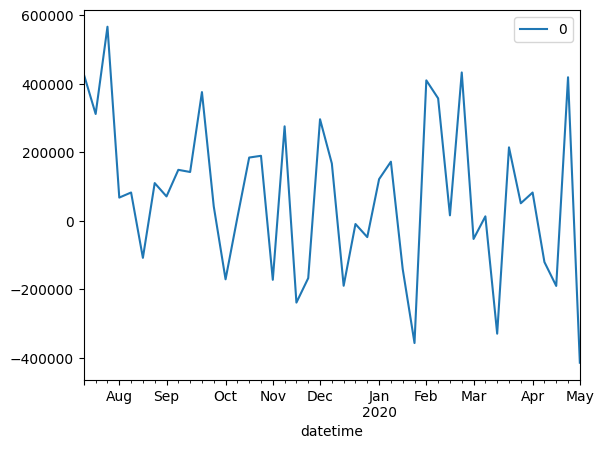

In [25]:
# plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

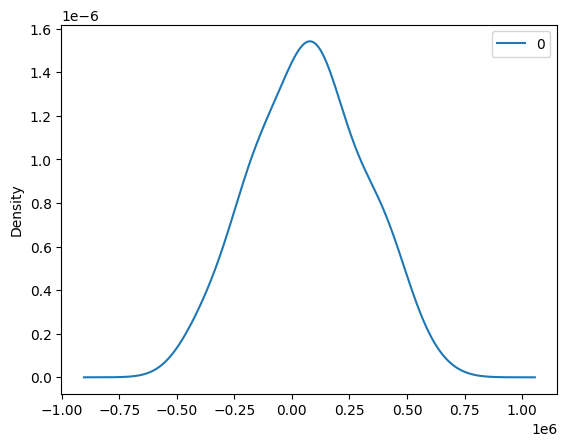

In [26]:
# Density plots of the residuals
residuals.plot(kind='kde')
pyplot.show()

In [27]:
# Descriptive statistics of the residuals
residuals.describe()

,0
count,43.000000
mean,70831.472750
std,233467.823434
min,-413882.897207
25%,-114158.086733
50%,71040.390183
75%,201781.782156
max,565854.977097


### 3.4: Splitting Data

The data will be split into training and testing sets.

In [28]:
# Splitting the dataset into training and testing sets
# the variable X receives the series data
X = bakery_weekly.values
X = X.astype('float32')

# Separates the data with 60% of the data for training and 40% of the data for testing
size = int(len(X) * 0.60)

# Separates training and testing data
train = X[0:size]
test =  X[size:]

In [29]:
# Creates the variable history
history = [x for x in train]

# Creates a predictions list
predictions = list()

### 3.5: Differencing Data


These functions handle differencing in time series analysis.

- difference(dataset, interval=1): Computes the difference between consecutive values in a dataset.

- inverse_difference(history, prediction, interval=1): Reverses the differencing effect, converting a differenced prediction back to the original scale by adding it to the last known value in the original time series.

In [30]:
# Creates the function that performs differencing
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# Creates the function that reverses the differenced value to the original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

### 3.6: Walk Forward

Finally, the walk-forward prediction process is performed, where the model is iteratively adjusted to the historical data to make future predictions, which are then compared with the actual values.

The predictions and actual values are printed for each period in the test set.

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Start Walk-Forward
for t in range(len(test)):
  
    # Difference the data
    meses_no_ano = 12
    diff = difference(history, meses_no_ano)
  
     # Create an ARIMA model with the history data
    model = ARIMA(diff, order=(0, 0, 1))
  
     # Train the ARIMA model
    model_fit = model.fit()
  
    # The variable predicted_value receives the value predicted by the model
    valor_predito = model_fit.forecast()[0]

    # Predicted_value receives the reversed value (original scale)
    valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
    # Add the predicted value to the predictions list
    predictions.append(valor_predito)
  
    # The variable actual_value receives the actual test value
    valor_real = test[t]
  
    # Add the actual value to the history variable
    history.append(valor_real)

    # Print predicted value and actual value
    print('Predicted value = %.3f, expected value = %.3f' % (valor_predito, valor_real))

Predicted value = 884416.250, expected value = 1113900.000
Predicted value = 1042369.688, expected value = 1223700.000
Predicted value = 1104322.750, expected value = 1060400.000
Predicted value = 804563.375, expected value = 713300.000
Predicted value = 1162863.500, expected value = 1225800.000
Predicted value = 971277.312, expected value = 1464900.000
Predicted value = 1037817.750, expected value = 1298900.000
Predicted value = 1340467.500, expected value = 1800900.000
Predicted value = 1577789.000, expected value = 1746100.000
Predicted value = 1113388.375, expected value = 1651000.000


Predicted value = 1440544.750, expected value = 1296700.000
Predicted value = 1106428.625, expected value = 1522700.000
Predicted value = 1393068.125, expected value = 1352700.000
Predicted value = 1308235.750, expected value = 1265700.000
Predicted value = 1143170.625, expected value = 1084300.000
Predicted value = 785505.688, expected value = 915400.000
Predicted value = 1386203.750, expected value = 1330100.000
Predicted value = 1541490.375, expected value = 825200.000


# Chapter 4: Conclusions

Finnaly, we'll be evaluating the results of the ARIMA model prediction.

First, we calculate the RMSE (Root Mean Squared Error), which is a measure of the difference between the actual values and the model predictions, indicating the accuracy of the predictions in terms of the original unit of measurement of the data.

### 4.1: RMSE

In [32]:
# Evaluating the results
# Importing the sqrt (square root) function from the numpy package
from numpy import sqrt
# Importing the mean_squared_error function from the sklearn.metrics package
from sklearn.metrics import mean_squared_error
# Calculating the RMSE between the actual test values and the model predictions
# The mean_squared_error function calculates the mean squared error between test and predictions
# The sqrt function is used to calculate the square root of the result, obtaining the RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 305042.156


We achieved an RMSE of around 305.042. This means that, on average, the model's predictions are deviating by about 305.042 units compared to the actual values.

The lower the RMSE value, the better the model's performance in terms of prediction, as it indicates a smaller dispersion of errors. It's important to keep in mind that the average value of weekly sales is 1,161,500.

Next, we will calculate the MAE (Mean Absolute Error), which is another measure of error between the actual values and the model's predictions, representing the average of the absolute differences between them. Additionally, we will calculate the MAPE (Mean Absolute Percentage Error), which is the MAE expressed as a percentage of the actual values, providing further insight into the relative error of the predictions.

### 4.2: MAE and MAPE

In [33]:
# Importing the mean_absolute_error function from the sklearn.metrics package
from sklearn.metrics import mean_absolute_error
# Calculating the Mean Absolute Error (MAE) between the actual test values and the model predictionsD
mae = mean_absolute_error(test, predictions)
# Calculating the Mean Absolute Percentage Error (MAPE) between the actual test values and the model predictions
# The expression np.abs((test - predictions) / test) calculates the absolute percentage difference between the actual values and the predictions
# np.mean calculates the average of these absolute percentage values
# Multiplying by 100 to obtain the percentage
mape = 100 * np.mean(np.abs((test - predictions) / test))

print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f%%' % mape)


Test MAE: 229676.438
Test MAPE: 18.582%


We obtained a MAPE of 18.58%. This means that, on average, the model's predictions have a relative error of about 18.58% compared to the actual values.

In other words, the model's predictions are deviating, on average, by about 18.58% from the actual values.

### 4.3: Plotting Real Values X Predictions

Finally, let's plot the actual values of the test set and the predictions made by the model to visualize how the predictions compare to the actual values over time.

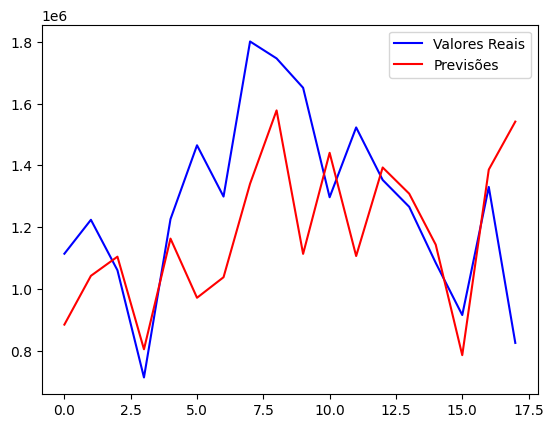

In [34]:
# Test set "Real Values" plot in blue
plt.plot(test, label='Real Values', color='blue')

# "Predictions" plot in red
plt.plot(predictions, label='Predictions', color='red')

# Add legend to the plot.
plt.legend()

# Show the Graph.
plt.show()